## LAB-2 ASSIGNMENT

### Name: Viraj M. Yawale
### Roll No. : A_64
### section: A


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

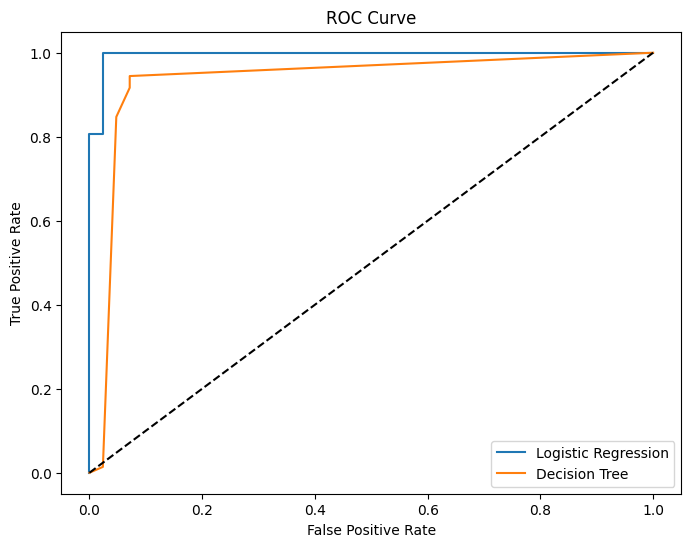


Model: Logistic Regression (SMOTE)
Accuracy: 0.9649
Precision: 0.9857
Recall: 0.9583
F1 Score: 0.9718
ROC-AUC: 0.9954


In [ ]:
# Load Required Libraries and Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE  # For handling class imbalance

# Load and Explore the Dataset

# Load the dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # Add target column

# Display basic info
print(df.head())
print(df['target'].value_counts())  # Check class distribution


# Preprocess the Data

# Split features and target
X = df.drop(columns=['target'])
y = df['target']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)



# Train Logistic Regression Model

# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test)
y_prob_log = log_reg.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve



# Train Decision Tree Model

# Train Decision Tree classifier
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)  # Limiting depth to avoid overfitting
tree_clf.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_clf.predict(X_test)
y_prob_tree = tree_clf.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve



# Evaluate Models

def evaluate_model(y_true, y_pred, y_prob, model_name):
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_true, y_prob):.4f}")

# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_log, y_prob_log, "Logistic Regression")

# Evaluate Decision Tree
evaluate_model(y_test, y_pred_tree, y_prob_tree, "Decision Tree")





#Plot ROC Curves
# Compute ROC curves
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label="Logistic Regression")
plt.plot(fpr_tree, tpr_tree, label="Decision Tree")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()




# Handle Class Imbalance with SMOTE

# Apply SMOTE to oversample minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Retrain Logistic Regression with balanced data
log_reg_smote = LogisticRegression()
log_reg_smote.fit(X_resampled, y_resampled)

# Evaluate model after handling imbalance
y_pred_smote = log_reg_smote.predict(X_test)
y_prob_smote = log_reg_smote.predict_proba(X_test)[:, 1]

evaluate_model(y_test, y_pred_smote, y_prob_smote, "Logistic Regression (SMOTE)")
